In [1]:
from google.colab import files
files.upload()

Saving pcDataset.csv to pcDataset.csv


{'pcDataset.csv': b'Acc_X,Acc_Y,Acc_Z,Class\r\n2.660984,-9.65303,0.470237,1\r\n2.223091,2.223091,2.223091,1\r\n2.098372,-9.481953,0.92607,1\r\n2.716461,-9.739352,0.912008,1\r\n2.288388,-9.371498,0.91039,1\r\n2.912962,-9.70228,0.736646,1\r\n2.228852,-9.616857,0.908367,1\r\n3.016232,-9.603462,0.339332,1\r\n2.106558,-9.628105,1.443061,1\r\n2.976023,-9.649939,-0.076014,1\r\n2.753596,-9.934291,1.854076,1\r\n2.59375,-9.289001,-0.38491,1\r\n2.928611,-9.751028,1.779072,1\r\n2.686823,-9.188087,-0.27228,1\r\n2.249143,-9.372323,1.645357,1\r\n3.130709,-9.587917,-0.016222,1\r\n2.634844,-9.35352,1.560577,1\r\n3.174378,-9.439078,0.478881,1\r\n2.516101,-9.551991,1.205062,1\r\n3.143967,-9.468188,0.239476,1\r\n1.884608,-9.746713,0.801013,1\r\n3.12039,-9.670359,0.051653,1\r\n2.444743,-9.651731,0.158261,1\r\n2.362298,-9.704863,0.563155,1\r\n2.63997,-9.731813,0.354877,1\r\n2.269175,-9.546275,0.891153,1\r\n3.228938,-9.676829,0.322055,1\r\n2.354986,-9.394252,1.019374,1\r\n2.833451,-9.502458,0.433126,1\r\n2.5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn import preprocessing
%matplotlib inline
from scipy.signal import butter, lfilter, freqz
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from collections import Counter
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import  Dense, LSTM, Dropout
from keras.layers import Flatten
from keras.regularizers import L1L2
from keras import regularizers

In [2]:
df = pd.read_csv("pcDataset.csv")
df

Acc_X      Acc_Y     Acc_Z  Class
0      2.660984  -9.653030  0.470237      1
1      2.223091   2.223091  2.223091      1
2      2.098372  -9.481953  0.926070      1
3      2.716461  -9.739352  0.912008      1
4      2.288388  -9.371498  0.910390      1
...         ...        ...       ...    ...
98824 -3.471593 -10.618559  0.802468     22
98825 -2.438870  -9.334789  1.514777     22
98826 -1.129311  -9.840170  1.750093     22
98827 -1.047292  -9.827171  2.336194     22
98828  0.611206  -1.003375  8.672960     22

[98829 rows x 4 columns]

In [3]:
df.shape

(98829, 4)

In [4]:
print(sorted(Counter(df['Class']).items()))

[(1, 6348), (2, 6518), (3, 5467), (4, 5305), (5, 5927), (6, 6994), (7, 6759), (8, 6944), (9, 2462), (10, 6671), (11, 6350), (12, 11699), (13, 3954), (14, 1948), (15, 1801), (16, 1890), (17, 1868), (18, 3828), (19, 3143), (20, 1143), (21, 299), (22, 1511)]


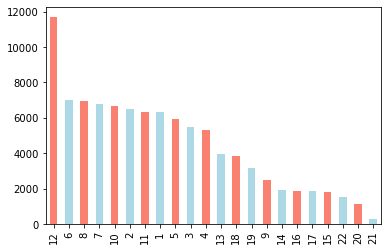

In [5]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
X = df
y = df['Class']
X.drop('Class',axis =1,inplace=True)

In [7]:
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state =0)
X_resampled, y_resampled = ros.fit_resample(X,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(1, 11699), (2, 11699), (3, 11699), (4, 11699), (5, 11699), (6, 11699), (7, 11699), (8, 11699), (9, 11699), (10, 11699), (11, 11699), (12, 11699), (13, 11699), (14, 11699), (15, 11699), (16, 11699), (17, 11699), (18, 11699), (19, 11699), (20, 11699), (21, 11699), (22, 11699)] (257378,)


In [8]:
X=X_resampled
y=y_resampled

In [9]:
df = X
df['Class'] =y

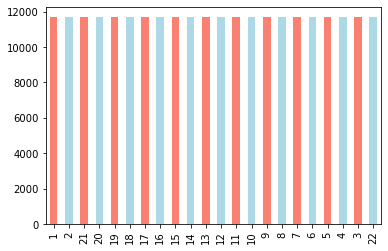

In [10]:
df["Class"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
print("DF HEAD: ",df.head)
print("DF DTYPE: ",df.dtypes)
print("DF SHAPE: ",df.shape)

print("DF ISNULL: ",df.isnull().sum())

DF HEAD:  <bound method NDFrame.head of            Acc_X      Acc_Y     Acc_Z  Class
0       2.660984  -9.653030  0.470237      1
1       2.223091   2.223091  2.223091      1
2       2.098372  -9.481953  0.926070      1
3       2.716461  -9.739352  0.912008      1
4       2.288388  -9.371498  0.910390      1
...          ...        ...       ...    ...
257373 -1.801836  -9.159019 -1.408988     22
257374 -2.228403 -10.495382 -2.029485     22
257375 -1.901543 -10.402466 -1.259966     22
257376 -2.956041 -11.729793  1.961650     22
257377 -2.162762 -10.620678 -2.150192     22

[257378 rows x 4 columns]>
DF DTYPE:  Acc_X    float64
Acc_Y    float64
Acc_Z    float64
Class      int64
dtype: object
DF SHAPE:  (257378, 4)
DF ISNULL:  Acc_X    0
Acc_Y    0
Acc_Z    0
Class    0
dtype: int64


In [12]:
import plotly.express as px
dfv= df[["Acc_X","Acc_Y","Acc_Z"]]
dfbv=dfv.isnull().sum()


sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(dfbv,title="Checking for Null values")

fig.show()

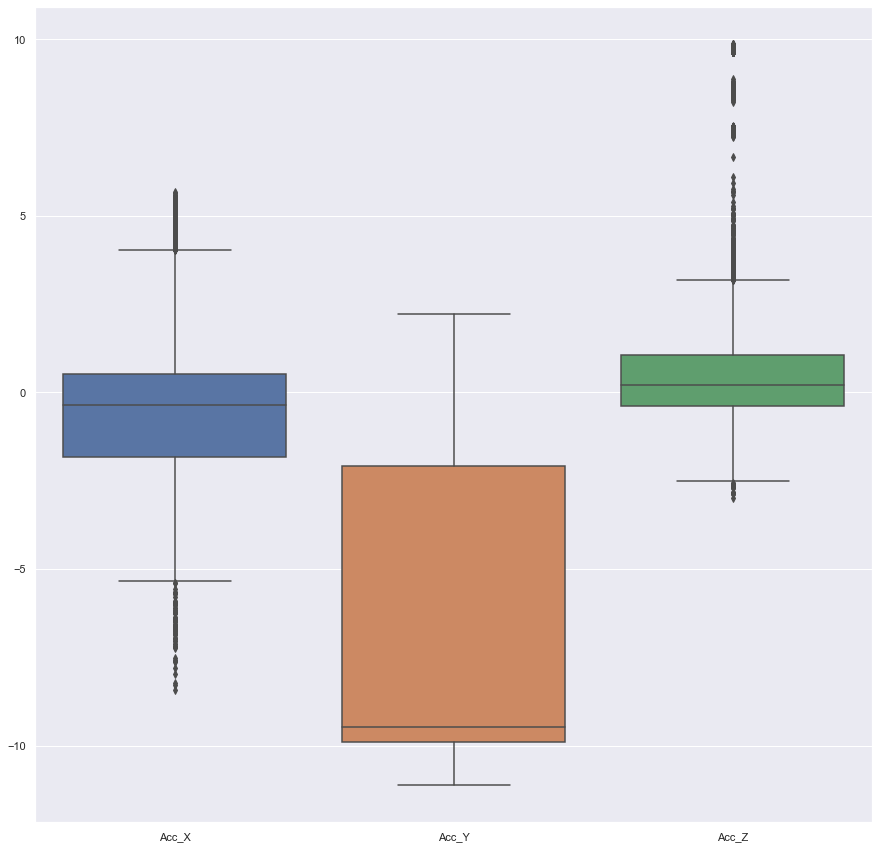

In [13]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig= sns.boxplot(data=df.iloc[0:25955,0:3])
figure=fig.get_figure()
figure.savefig("withOutliers.png")


In [14]:
f=0
g=0
p=0

#finding first and last index of every class
ind=df.index.to_series().groupby(df['Class']).agg(['first','last']).reset_index()
print(ind)

    Class  first    last
0       1      0  104179
1       2   6348  109360
2       3  12866  115592
3       4  18333  121986
4       5  23638  127758
5       6  29565  132463
6       7  36559  137403
7       8  43318  142158
8       9  50262  151395
9      10  52724  156423
10     11  59395  161772
11     12  65745   77443
12     13  77444  169517
13     14  81398  179268
14     15  83346  189166
15     16  85147  198975
16     17  87037  208806
17     18  88905  216677
18     19  92733  225233
19     20  95876  235789
20     21  97019  247189
21     22  97318  257377


In [15]:
for m in range(1,23):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,2):
        #print("For i=i.value")
        tenth= A.iloc[:,i].quantile(0.10)
        ninety=A.iloc[:,i].quantile(0.90)
        #print(Avg)
        Q1 = A.iloc[:,i].quantile(0.25)
        #print(Q1)
        Q3 = A.iloc[:,i].quantile(0.75)
        #print(Q3)
        IQR = Q3 - Q1
        lim1=(Q1 - 1.5 * IQR)
        
        #print(lim1)
        lim2=(Q3 + 1.5 * IQR)
        #print(lim2)
        #print(IQR)
        for ami in range(first,last+1):
            com=df.iloc[ami,i]
            if(com < lim1):
                df.iloc[ami,i] = tenth
                f=f+1
            elif(com > lim2):
                df.iloc[ami,i] = ninety
                f=f+1
                
        print(f)
    if(p<21):
        p=p+1

(11699, 4)
0
104179
380
62067
(11699, 4)
6348
109360
109522
194355
(11699, 4)
12866
115592
194722
194722
(11699, 4)
18333
121986
194723
201233
(11699, 4)
23638
127758
238468
238468
(11699, 4)
29565
132463
241287
241287
(11699, 4)
36559
137403
249105
249105
(11699, 4)
43318
142158
254403
254403
(11699, 4)
50262
151395
261042
261042
(11699, 4)
52724
156423
263499
288194
(11699, 4)
59395
161772
296123
296166
(11699, 4)
65745
77443
296448
296513
(11699, 4)
77444
169517
304600
352496
(11699, 4)
81398
179268
355232
406220
(11699, 4)
83346
189166
406228
406245
(11699, 4)
85147
198975
409560
418155
(11699, 4)
87037
208806
438522
452256
(11699, 4)
88905
216677
452599
454370
(11699, 4)
92733
225233
454654
455393
(11699, 4)
95876
235789
455848
456013
(11699, 4)
97019
247189
456153
456229
(11699, 4)
97318
257377
492039
509598


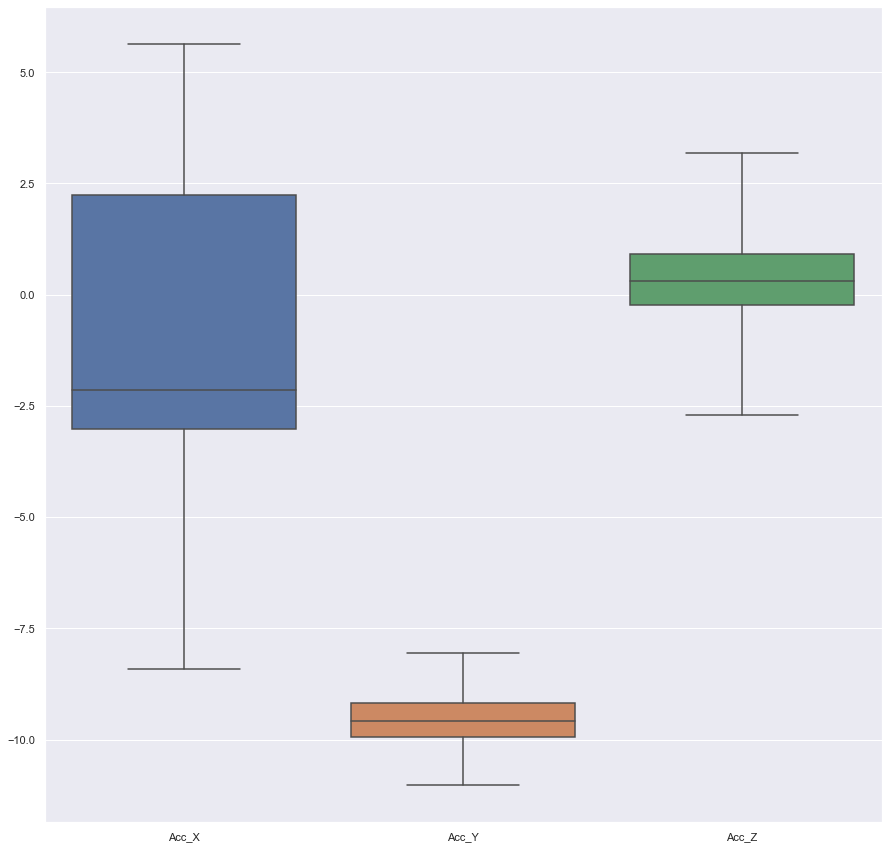

In [16]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(15,15)})
fig=sns.boxplot(data=df.iloc[0:6000,0:3],whis=[0, 100])
count=0
figure=fig.get_figure()
figure.savefig("withOut_Outliers(Final Har_intensity).png")

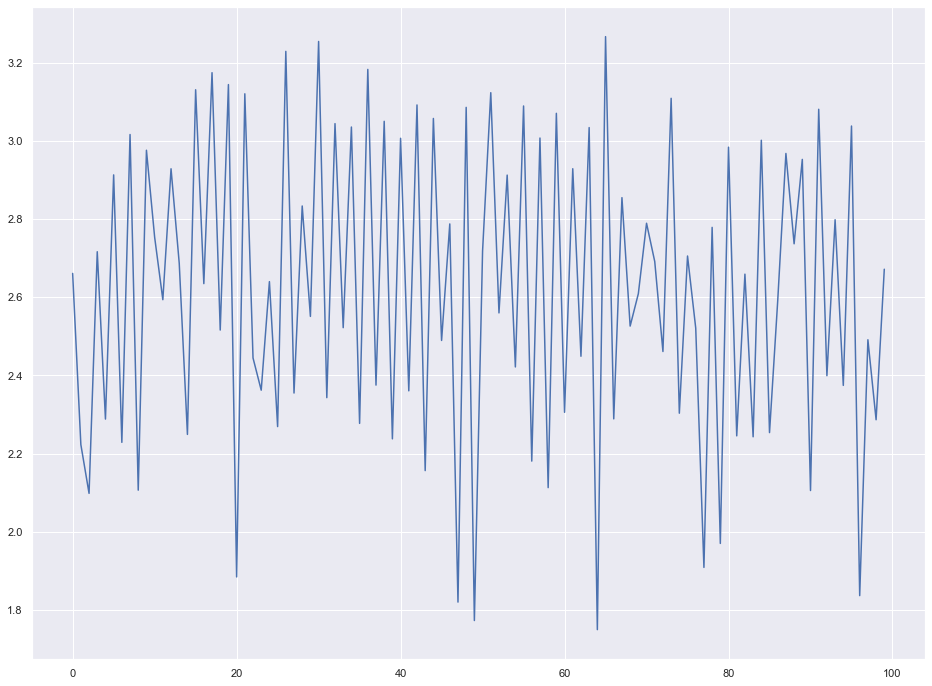

In [17]:
a = df.Acc_X
a = a[:100]
bx = a.plot(subplots=True,figsize=(16,12))

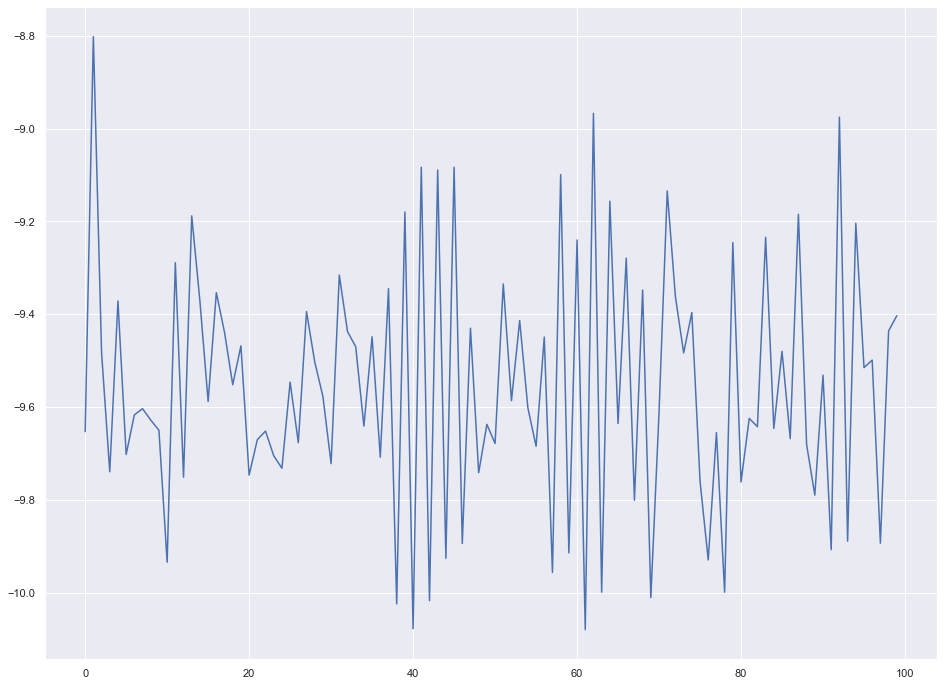

In [18]:
b = df.Acc_Y
b = b[:100]
bx = b.plot(subplots=True,figsize=(16,12))

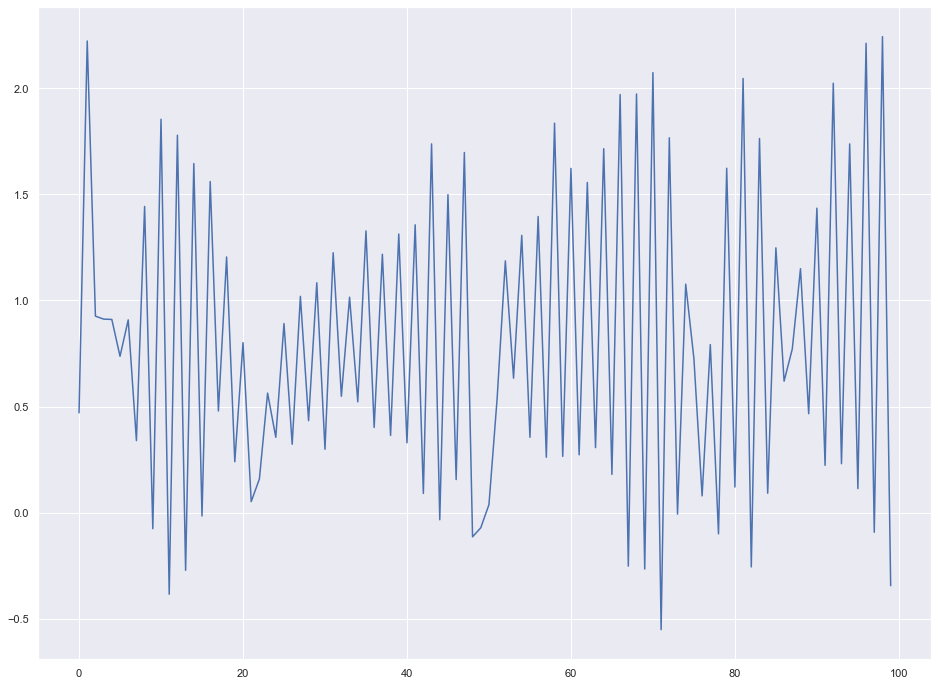

In [19]:
c = df.Acc_Z
c = c[:100]
cx = c.plot(subplots=True,figsize=(16,12))

In [20]:
#butter worth filtering
def butter_lowpass(cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    print(b,a)
    y = lfilter(b, a, data)
    return y


p=0 

#filtering data with low pass filter
for m in range(1,23):
    A = df.loc[df['Class'] == m]
    print(A.shape)
    first=ind.iloc[p,1]
    print(first)
    last=ind.iloc[p,2]
    print(last)
    for i in range(0,3):
        df.iloc[first:last+1,i]= butter_lowpass_filter(df.iloc[first:last+1,i], 10, 100, 10)
    if(p<21):
        p = p+1

(11699, 4)
0
104179
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1

[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874e+01 -5.64707434e+00
  1.47372794e+00 -2.30919346e-01  1.64796305e-02]
(11699, 4)
92733
225233
[1.68358141e-06 1.68358141e-05 7.57611633e-05 2.02029769e-04
 3.53552096e-04 4.24262515e-04 3.53552096e-04 2.02029769e-04
 7.57611633e-05 1.68358141e-05 1.68358141e-06] [ 1.00000000e+00 -5.98758963e+00  1.66721933e+01 -2.82587879e+01
  3.21597565e+01 -2.56017496e+01  1.44056874

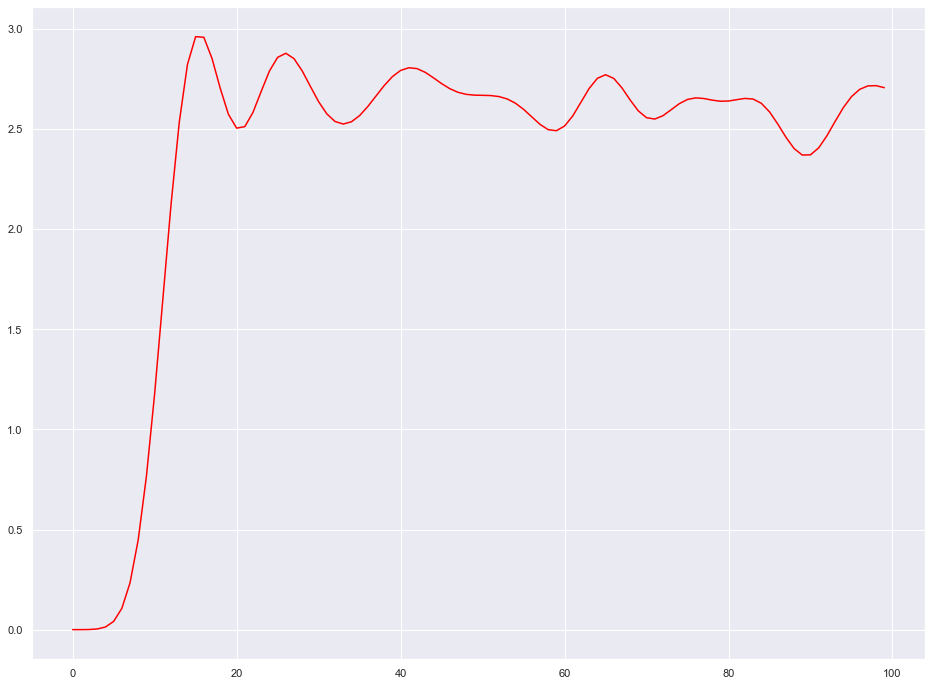

In [21]:
d = df.Acc_X
d = d[:100]
dx = d.plot(subplots=True,figsize=(16,12),color="red")

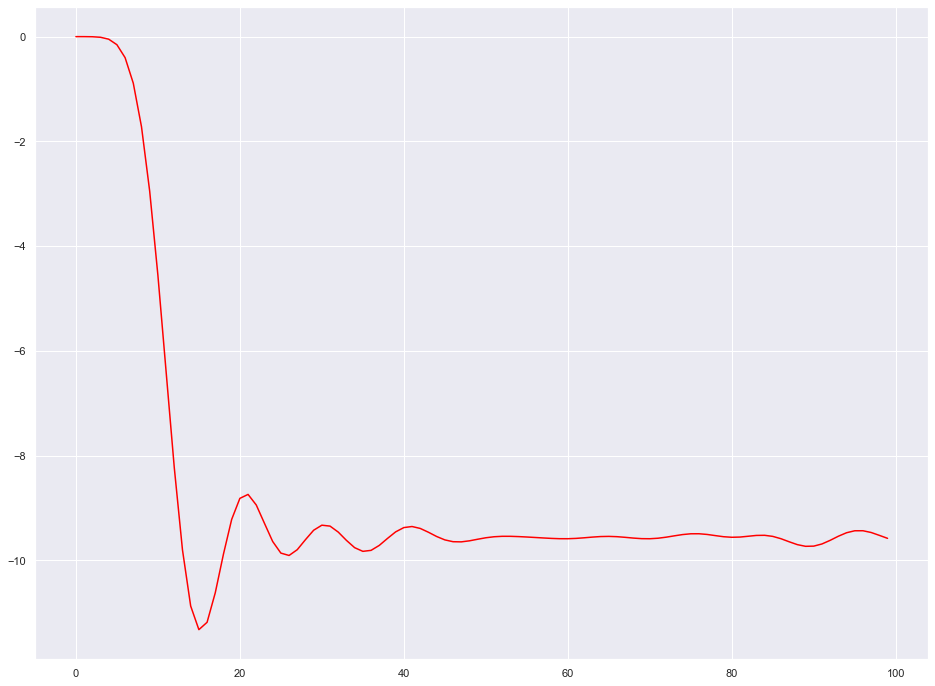

In [22]:
e = df.Acc_Y
e = e[:100]
ex = e.plot(subplots=True,figsize=(16,12),color="red")

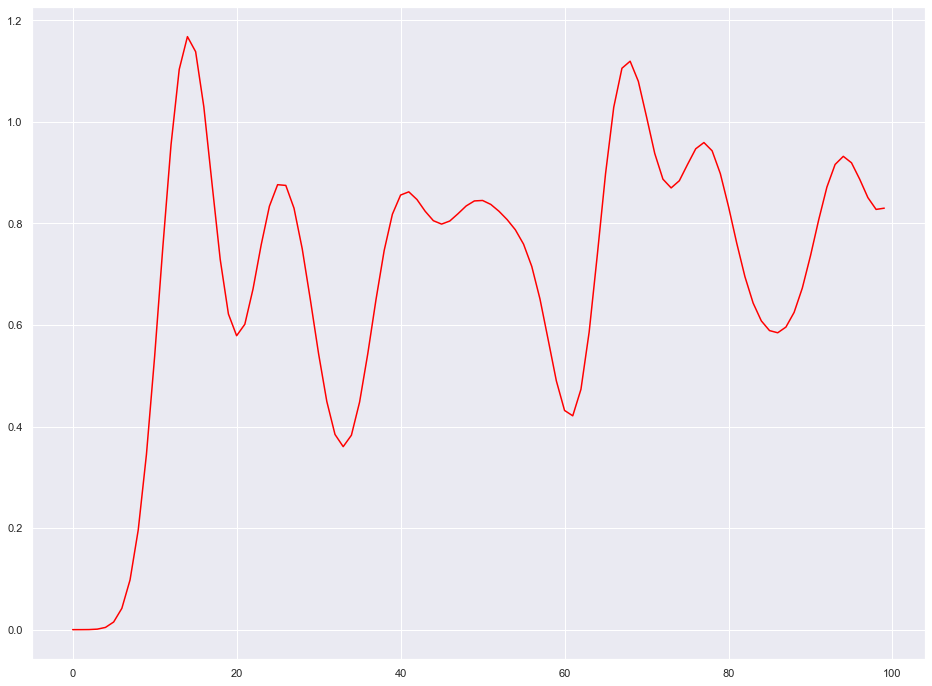

In [23]:
f = df.Acc_Z
f = f[:100]
fx = f.plot(subplots=True,figsize=(16,12),color="red")

In [24]:
#feature enginerring
df=df.eval('Mean = (Acc_X+Acc_Y+Acc_Z)/3')
df['Median']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].median(axis=1)
df['Variance']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].var(axis=1)
df['Standard_Deviation']=df.loc[:,['Acc_X','Acc_Y','Acc_Z']].std(axis=1)
df

Acc_X      Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004  -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075  -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619  -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323  -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159  -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...        ...           ...    ...       ...           ...   
257373 -0.721491  -9.886659 -4.723162e-01     22 -3.693489 -7.214906e-01   
257374 -0.783292 -10.010514 -6.292384e-01     22 -3.807681 -7.832918e-01   
257375 -0.884597 -10.121035 -8.232454e-01     22 -3.942959 -8.845967e-01   
257376 -1.010452 -10.153097 -1.012076e+00     22 -4.058542 -1.012076e+00   
257377 -1.145163 -10.069921 -1.166244e+00     22 -4.127109 -1.166244e+00   

            Variance  Standard_Deviation  
0       1.223134e-10            0.000011  
1       3.511515e-08            0.000187  
2       2.408401e-06            0.001552  
3       7.061404e-05            0.008403  
4       1.127895e-03            0.033584  
...              ...                 ...  
257373  2.878204e+01            5.364890  
257374  2.886228e+01            5.372363  
257375  2.862741e+01            5.350459  
257376  2.785770e+01            5.278040  
257377  2.648787e+01            5.146636  

[257378 rows x 8 columns]

In [25]:
sort=np.sort(df.loc[:,['Acc_X','Acc_Y','Acc_Z']],axis=1)

q3=[]
q1=[]
for x in sort:

    q3x,q1x= np.percentile(x,[75,25])
    q3.append(q3x)
    q1.append(q1x)
df['Q3']=q3
df['Q1']=q1
df

Acc_X      Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004  -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075  -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619  -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323  -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159  -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...        ...           ...    ...       ...           ...   
257373 -0.721491  -9.886659 -4.723162e-01     22 -3.693489 -7.214906e-01   
257374 -0.783292 -10.010514 -6.292384e-01     22 -3.807681 -7.832918e-01   
257375 -0.884597 -10.121035 -8.232454e-01     22 -3.942959 -8.845967e-01   
257376 -1.010452 -10.153097 -1.012076e+00     22 -4.058542 -1.012076e+00   
257377 -1.145163 -10.069921 -1.166244e+00     22 -4.127109 -1.166244e+00   

            Variance  Standard_Deviation        Q3        Q1  
0       1.223134e-10            0.000011  0.000003 -0.000008  
1       3.511515e-08            0.000187  0.000046 -0.000129  
2       2.408401e-06            0.001552  0.000389 -0.001055  
3       7.061404e-05            0.008403  0.002154 -0.005637  
4       1.127895e-03            0.033584  0.008769 -0.022262  
...              ...                 ...       ...       ...  
257373  2.878204e+01            5.364890 -0.596903 -5.304075  
257374  2.886228e+01            5.372363 -0.706265 -5.396903  
257375  2.862741e+01            5.350459 -0.853921 -5.502816  
257376  2.785770e+01            5.278040 -1.011264 -5.582587  
257377  2.648787e+01            5.146636 -1.155704 -5.618083  

[257378 rows x 10 columns]

In [26]:
for index, row in df.iterrows():
     rms=np.sqrt(((df['Acc_X'] ** 2) + (df['Acc_Y'] ** 2) +(df['Acc_Z'] ** 2))/3)
df['RMS']=rms
df

Acc_X      Acc_Y         Acc_Z  Class      Mean        Median  \
0       0.000004  -0.000016  7.916823e-07      1 -0.000004  7.916823e-07   
1       0.000075  -0.000275  1.639985e-05      1 -0.000061  1.639985e-05   
2       0.000619  -0.002269  1.596088e-04      1 -0.000497  1.596088e-04   
3       0.003323  -0.012259  9.851752e-04      1 -0.002650  9.851752e-04   
4       0.013159  -0.048901  4.378206e-03      1 -0.010455  4.378206e-03   
...          ...        ...           ...    ...       ...           ...   
257373 -0.721491  -9.886659 -4.723162e-01     22 -3.693489 -7.214906e-01   
257374 -0.783292 -10.010514 -6.292384e-01     22 -3.807681 -7.832918e-01   
257375 -0.884597 -10.121035 -8.232454e-01     22 -3.942959 -8.845967e-01   
257376 -1.010452 -10.153097 -1.012076e+00     22 -4.058542 -1.012076e+00   
257377 -1.145163 -10.069921 -1.166244e+00     22 -4.127109 -1.166244e+00   

            Variance  Standard_Deviation        Q3        Q1       RMS  
0       1.223134e-10            0.000011  0.000003 -0.000008  0.000010  
1       3.511515e-08            0.000187  0.000046 -0.000129  0.000165  
2       2.408401e-06            0.001552  0.000389 -0.001055  0.001361  
3       7.061404e-05            0.008403  0.002154 -0.005637  0.007355  
4       1.127895e-03            0.033584  0.008769 -0.022262  0.029347  
...              ...                 ...       ...       ...       ...  
257373  2.878204e+01            5.364890 -0.596903 -5.304075  5.729737  
257374  2.886228e+01            5.372363 -0.706265 -5.396903  5.808611  
257375  2.862741e+01            5.350459 -0.853921 -5.502816  5.884884  
257376  2.785770e+01            5.278040 -1.011264 -5.582587  5.919760  
257377  2.648787e+01            5.146636 -1.155704 -5.618083  5.889958  

[257378 rows x 11 columns]

In [27]:
C=df

In [28]:
#separating target column
X = C.drop('Class', axis=1)  
y = C['Class']

Feature: 0, Score: 0.06563
Feature: 1, Score: 0.10375
Feature: 2, Score: 0.15960
Feature: 3, Score: 0.21030
Feature: 4, Score: 0.07975
Feature: 5, Score: 0.10592
Feature: 6, Score: 0.09631
Feature: 7, Score: 0.05066
Feature: 8, Score: 0.08431
Feature: 9, Score: 0.04376


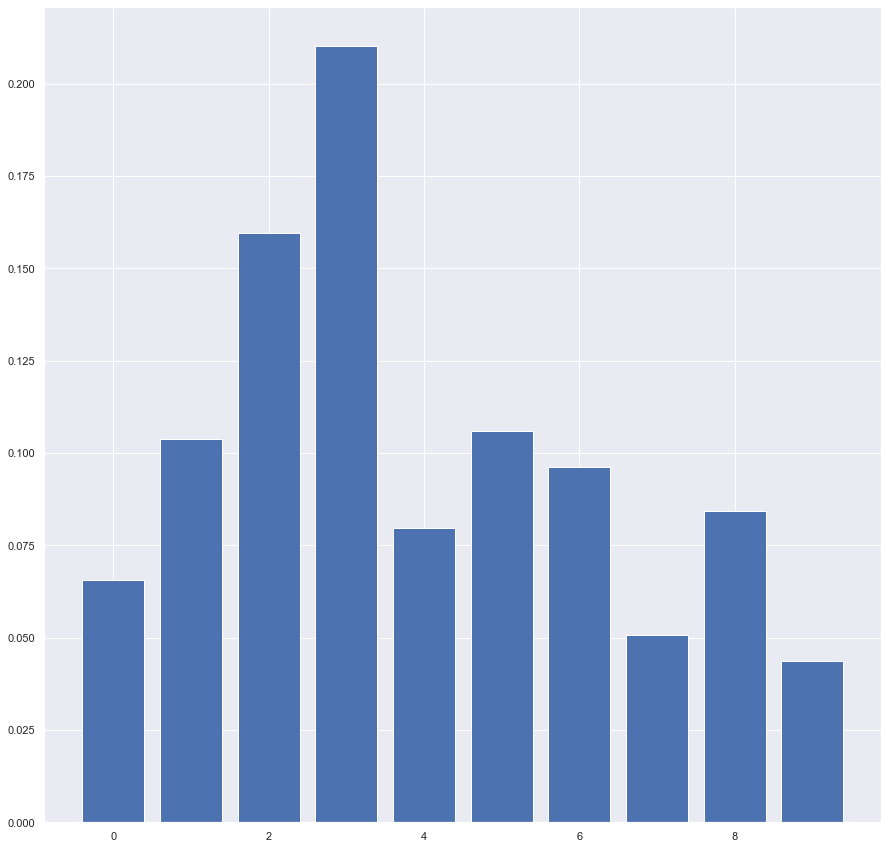

In [29]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [30]:
#taking filtered data into new dataframe
B=df

In [31]:
#separating target column
X = B.drop('Class', axis=1)  
y = B['Class']

In [32]:
N_TIME_STEPS = 10
N_FEATURES = 10
step = 1
segments = []
labels = []

#segemting data
for i in range(0, len(B) - N_TIME_STEPS, step):
    accxs = B['Acc_X'].values[i: i + N_TIME_STEPS]
    accys = B['Acc_Y'].values[i: i + N_TIME_STEPS]
    acczs = B['Acc_Z'].values[i: i + N_TIME_STEPS]
    mean = B['Mean'].values[i: i + N_TIME_STEPS]
    median = B['Median'].values[i: i + N_TIME_STEPS]
    variance = B['Variance'].values[i: i + N_TIME_STEPS]
    SD = B['Standard_Deviation'].values[i: i + N_TIME_STEPS]
    rms = B['RMS'].values[i: i + N_TIME_STEPS]
    q3 = B['Q3'].values[i: i + N_TIME_STEPS]
    q1 = B['Q1'].values[i: i + N_TIME_STEPS]
    


    label = stats.mode(B['Class'][i: i + N_TIME_STEPS])[0][0]
    segments.append([accxs, accys, acczs,mean,median,variance,SD,rms,q3,q1]) 
    labels.append(label)
    

print("SEGMENTS SHAPE: ",np.array(segments).shape)
print("LABELS SHAPE: ",np.array(labels).shape)

C:\Users\Hp\AppData\Local\Temp/ipykernel_19576/3046773090.py:22: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



SEGMENTS SHAPE:  (257368, 10, 10)
LABELS SHAPE:  (257368,)


In [33]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.int64)

print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels[0])

RESHAPE SHAPE:  (257368, 10, 10)
LABELS:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
print("RESHAPE SHAPE: ",reshaped_segments.shape)
print("LABELS: ",labels.shape)

RESHAPE SHAPE:  (257368, 10, 10)
LABELS:  (257368, 22)


In [35]:
random_seed = 42   
# n_time_steps = 1 
# n_features = 4 
# step = 1
# n_classes = 20 
# n_epochs = 50       
# batch_size = 1024   
# learning_rate = 0.0025
# l2_loss = 0.0015
X_train, X_val, y_train, y_val = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed,stratify = labels)

In [36]:
# X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size=0.20) 
# Use the same function above for the validation set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20) # 0.25 x 0.8 = 0.2


print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("X_val shape: {}".format(X_val.shape))
print("y val shape: {}".format(y_val.shape))

X_train shape: (164715, 10, 10)
X_test shape: (41179, 10, 10)
y_train shape: (164715, 22)
y_test shape: (41179, 22)
X_val shape: (51474, 10, 10)
y val shape: (51474, 22)


In [37]:
# Initialising the LSTM
classifier = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 256, return_sequences = True, activation='tanh'))
# Adding a second LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 128, return_sequences = True, activation='tanh'))
classifier.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 64, return_sequences = True, activation='relu'))
# Adding a fourth LSTM layer and some Dropout regularisation
classifier.add(LSTM(units = 32, activation='tanh'))
# Adding the output layer
classifier.add(Dense(units = 22, activation='softmax'))
# Compiling the LSTM
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
history = classifier.fit(X_train, y_train, epochs = 50, validation_data=(X_val, y_val), batch_size = 256, verbose = 1)

Epoch 1/50
644/644 [==============================] - 176s 272ms/step - loss: 0.4349 - accuracy: 0.8475 - val_loss: 0.4584 - val_accuracy: 0.8401
Epoch 2/50
644/644 [==============================] - 177s 275ms/step - loss: 0.4332 - accuracy: 0.8471 - val_loss: 0.4373 - val_accuracy: 0.8474
Epoch 3/50
644/644 [==============================] - 179s 278ms/step - loss: 0.4194 - accuracy: 0.8527 - val_loss: 0.4241 - val_accuracy: 0.8559
Epoch 4/50
644/644 [==============================] - 177s 274ms/step - loss: 0.4243 - accuracy: 0.8506 - val_loss: 0.4365 - val_accuracy: 0.8497
Epoch 5/50
644/644 [==============================] - 180s 279ms/step - loss: 0.4053 - accuracy: 0.8551 - val_loss: 0.3922 - val_accuracy: 0.8611
Epoch 6/50
644/644 [==============================] - 180s 279ms/step - loss: 0.4003 - accuracy: 0.8580 - val_loss: 0.4180 - val_accuracy: 0.8532
Epoch 7/50
644/644 [==============================] - 184s 285ms/step - loss: 0.4024 - accuracy: 0.8575 - val_loss: 0.3987 -

In [41]:
classifier.evaluate(X_test,y_test, batch_size = 256)

161/161 [==============================] - 16s 98ms/step - loss: 0.2536 - accuracy: 0.9100


[0.25357070565223694, 0.9099541306495667]

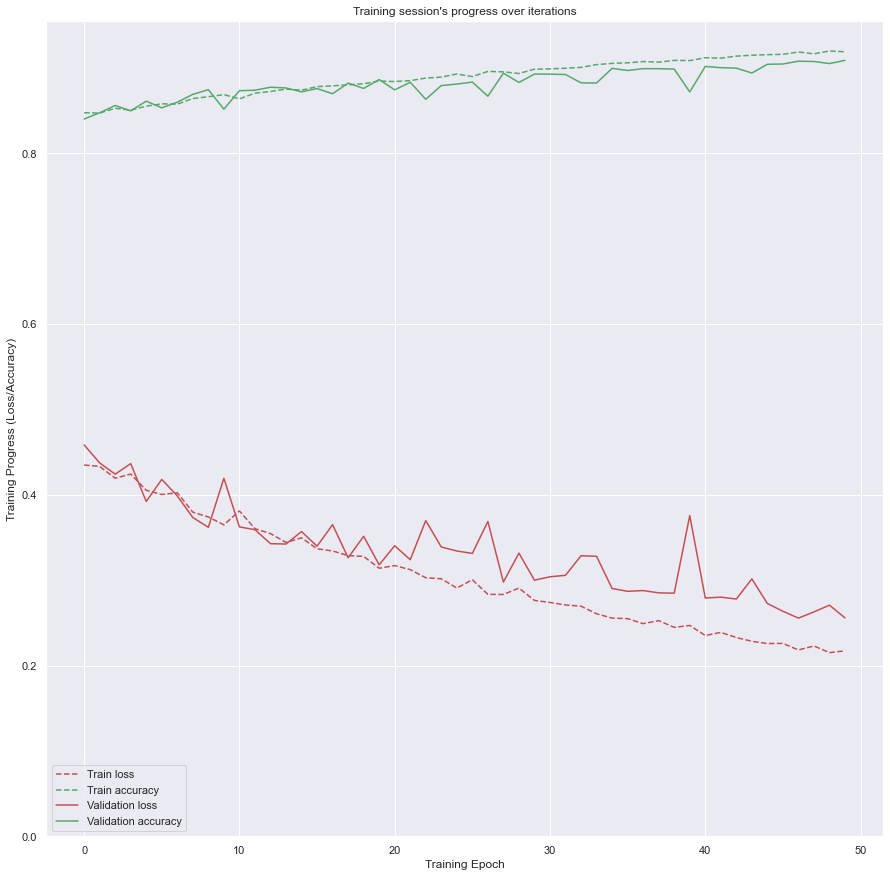

mean,std,min error on tr_loss: %.4f,%.4f,%.4f (0.3053531539440155, 6.472762677163817, 0.21513326466083527)
mean,std,min error on tr_acc: %.4f,%.4f,%.4f (0.8888367176055908, 2.144487236777705, 0.8471359610557556)
mean,std,min error on val_loss: %.4f,%.4f,%.4f (0.33434062361717226, 5.150479973829163, 0.2555391192436218)
mean,std,min error on val_acc: %.4f,%.4f,%.4f (0.8815021181106567, 1.7598288277433642, 0.8400940299034119)


In [42]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

from numpy import mean
from numpy import std

tr_loss=history.history['loss']
tr_acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']

print('mean,std,min error on tr_loss: %.4f,%.4f,%.4f',(mean(tr_loss),std(tr_loss)*100,min(tr_loss)))
print('mean,std,min error on tr_acc: %.4f,%.4f,%.4f',(mean(tr_acc),std(tr_acc)*100,min(tr_acc)))
print('mean,std,min error on val_loss: %.4f,%.4f,%.4f',(mean(val_loss),std(val_loss)*100,min(val_loss)))
print('mean,std,min error on val_acc: %.4f,%.4f,%.4f',(mean(val_acc),std(val_acc)*100,min(val_acc)))

1287/1287 [==============================] - 39s 30ms/step


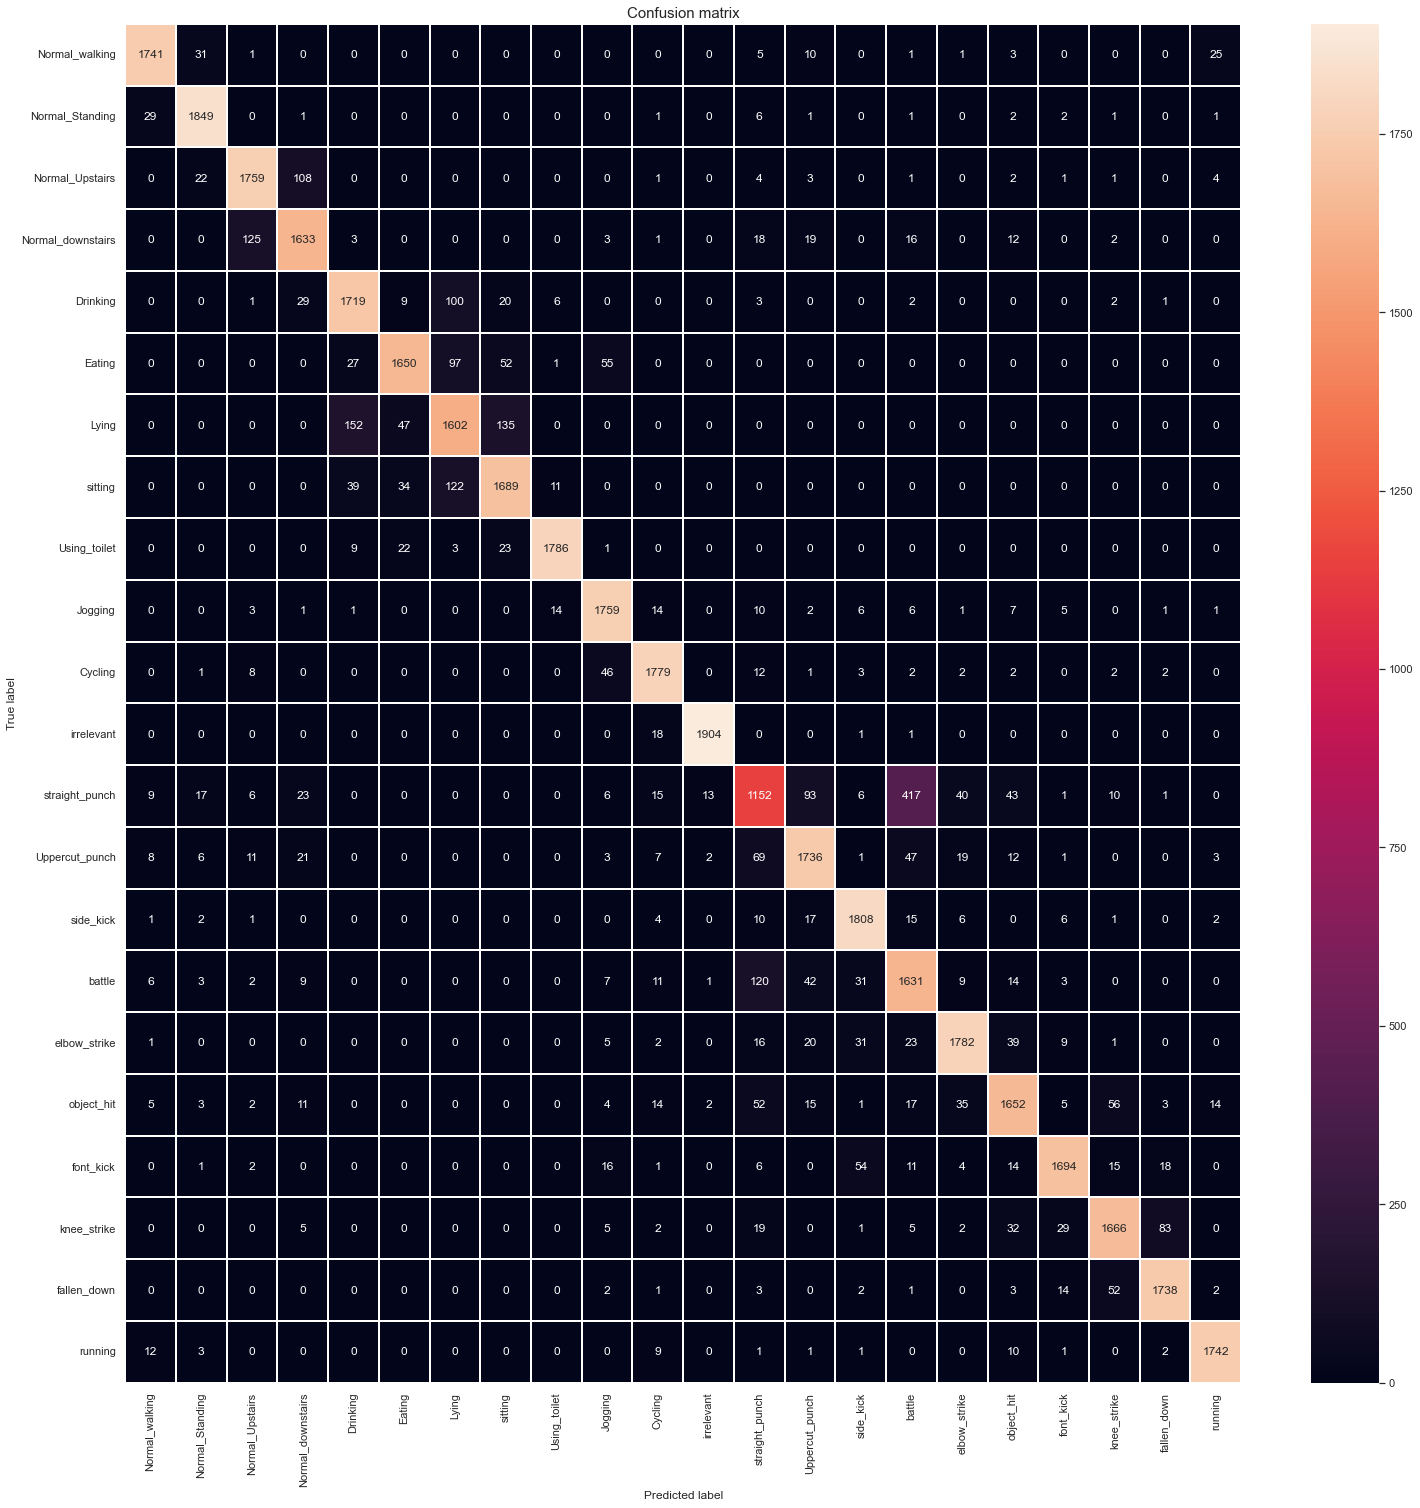

In [45]:
predictions = classifier.predict(X_test)
class_labels = ["Normal_walking",
                'Normal_Standing',
                'Normal_Upstairs',
                'Normal_downstairs',
                'Drinking','Eating',"Lying","sitting",
                "Using_toilet","Jogging","Cycling","irrelevant","straight_punch",
               "Uppercut_punch","side_kick","battle","elbow_strike","object_hit","font_kick","knee_strike","fallen_down","running"]
max_test = np.argmax(y_test, axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix, xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('confusionM1.png')
plt.show()

1287/1287 [==============================] - 39s 30ms/step


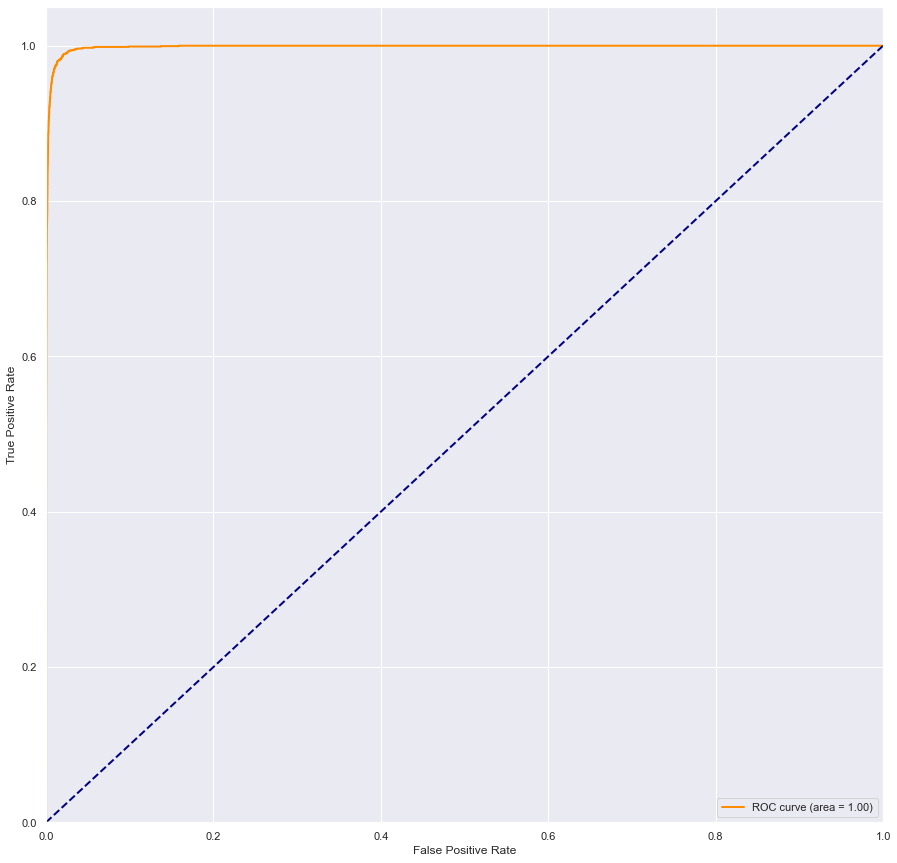

In [47]:
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 22 # number of class

y_pred = classifier.predict(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2 # line_width
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [48]:
classifier.save("modelalltry1.h5")